In [167]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
# here, we shall create our dataset using the make_blobs() from sklearn

from sklearn.datasets import make_blobs
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,        # how many clusters/centroids in dataset
                  cluster_std=1.0,  # how much noise to be added to these datapoints
                  random_state=101)

In [169]:
data # this a tuple

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [170]:
len(data)

2

In [171]:
# tuple unpacking

X,y = data

In [172]:
X[:5]

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645]])

In [173]:
y[:5]

array([1, 0, 0, 1, 1])

In [174]:
# let's add another feature into the dataset, which has noise compared to the other 2

np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)
z_noise[:5]

0    2.706850
1    0.628133
2    0.907969
3    0.503826
4    0.651118
dtype: float64

In [175]:
# combine the old dataframe and the noisy series

feat = pd.DataFrame(X)
feat = pd.concat([feat, z_noise], axis=1)
feat.columns = ['X1','X2','X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


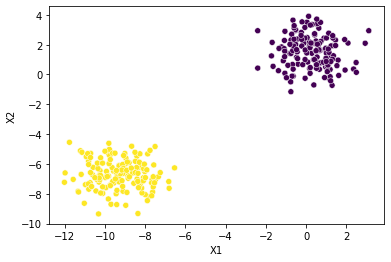

In [176]:
sns.scatterplot(x=feat['X1'],y=feat['X2'], c=y)

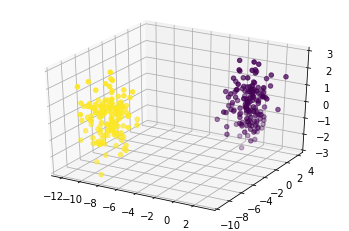

In [177]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

from the plot, we can see that X3 has some noise and clearly there is no separation between the two clusters. So when trained the autoencoder, it takes the most important feaatures only, we can already assume that it takes majority of X1 and X2 feature values as a representation of lower dimensional feature set of the original data.

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD     # here, we can play with the learning rates with Stochastic gradient descent

3 ----> 2 ----->3

In [179]:
# Encoder

encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [180]:
# Decoder

decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [181]:
# Autoencoder = Encoder + Decoder

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer=SGD(learning_rate=1.5), loss='mse')

In [182]:
autoencoder.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 2)                 8         
                                                                 
 sequential_22 (Sequential)  (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


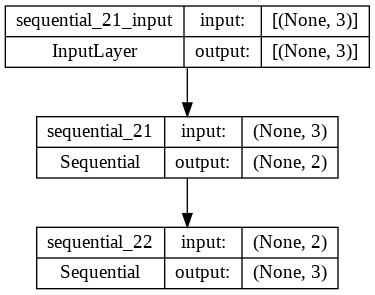

In [183]:
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [184]:
# scaling of the values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [185]:
# since here we don't know the outputs, we can transform on the whole data

scaled_data = scaler.fit_transform(feat)

In [186]:
# Training
autoencoder.fit(scaled_data, scaled_data, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2504
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2450
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2420
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2410
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2415
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2402
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2395
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2393
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2408


In [187]:
encoded_2dim = encoder.predict(scaled_data)     # grab the bottleneck of the encoder, to get the reduced from 3-D to 2-D

10/10 [==============================] - 0s 2ms/step


In [188]:
print("Original data: ", scaled_data.shape)
print("Dimensionally reduced: ", encoded_2dim.shape)

Original data:  (300, 3)
Dimensionally reduced:  (300, 2)


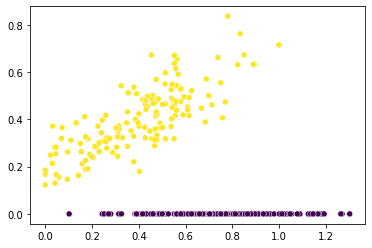

In [189]:
sns.scatterplot(x=encoded_2dim[:,0],y= encoded_2dim[:,1], c=y)